# **Economics with Data Science - Dissertation Unit (ECONM0017)**
Week on Data Visualisation.

Exercises to create figures based on house price index data for the UK

For EwDS dissertation unit (ECONM0017)

Data is available on Blackboard 
or at https://www.gov.uk/government/statistical-data-sets/uk-house-price-index-data-downloads-september-2024

By Kevin Tran

# 1. Load and prepare data

We will load the data and browse through it to better grasp its content and structure.
Data documentation can be found at: 
https://www.gov.uk/government/publications/about-the-uk-house-price-index/about-the-uk-house-price-index#data-tables

Then, we create some additional variables we need for our next steps.

In [1]:
### Load packages
# pandas to work with DataFrames
import pandas as pd
# Set option to show more columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# To create plots
import matplotlib.pyplot as plt
# To work with dates in figures
import matplotlib.dates
from datetime import datetime
# To add fitted lines to figures
import seaborn as sns
# To work with arrays
import numpy as np
# To work with shapefiles to create maps
import geopandas as gpd

In [2]:
### Load House Price Index (HPI) data
file_data = 'UK-HPI-full-file-2024-09.csv'
df_hpi = pd.read_csv(file_data)


In [3]:
### Take a look at the data
df_hpi

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,122490.0641,43.610982,NaN,NaN,70563.15784,40.821887,NaN,NaN,55319.63336,38.305671,NaN,NaN,48016.07412,42.433549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,121280.8840,43.180469,-0.987166,NaN,70804.42408,40.961464,0.341915,NaN,55720.07531,38.582954,0.723869,NaN,49030.18133,43.329752,2.112016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,123395.4269,43.933325,1.743509,NaN,72689.07253,42.051762,2.661767,NaN,57362.85925,39.720488,2.948280,NaN,50349.44771,44.495636,2.690723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,122334.0258,43.555427,-0.860162,NaN,74484.23119,43.090289,2.469640,NaN,59193.39722,40.988030,3.191155,NaN,51736.22329,45.721180,2.754301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,124498.8747,44.326193,1.769621,NaN,76637.73414,44.336124,2.891220,NaN,61202.79629,42.379424,3.394634,NaN,53230.23061,47.041488,2.887739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143005,01/05/2024,Yorkshire and The Humber,E12000003,209268.00000,153.700000,152.0,2.100000,4.1,206970.0,4528.0,335689.0000,154.100000,3.200000,4.3,210811.00000,157.500000,2.300000,4.7,166982.00000,153.500000,1.500000,4.0,138741.00000,139.200000,1.400000,1.2,198985.0,150.9,2.1,3.5,1252.0,214442.0,155.0,2.2,4.3,2788.0,179907.0,154.0,2.0,4.2,234759.0,153.3,2.3,4.0,304791.00000,183.500000,11.500000,20.7,9.0,205479.00000,153.100000,1.700000,3.3,4519.0
143006,01/06/2024,Yorkshire and The Humber,E12000003,213840.00000,157.000000,153.9,2.200000,4.0,209550.0,3657.0,340049.0000,156.100000,1.300000,3.2,214889.00000,160.500000,1.900000,4.7,172101.00000,158.200000,3.100000,4.4,141718.00000,142.200000,2.100000,2.3,203113.0,154.1,2.1,3.2,936.0,219241.0,158.4,2.2,4.4,2126.0,184397.0,157.9,2.5,4.5,239061.0,156.1,1.8,3.5,304917.00000,183.600000,0.000000,21.4,11.0,210195.00000,156.600000,2.300000,3.3,3646.0
143007,01/07/2024,Yorkshire and The Humber,E12000003,213824.00000,157.000000,153.4,0.000000,3.2,208851.0,3637.0,340891.0000,156.500000,0.200000,2.9,215691.00000,161.100000,0.400000,3.6,171299.00000,157.500000,-0.500000,3.4,141061.00000,141.500000,-0.500000,1.0,202672.0,153.7,-0.2,2.5,77

In [4]:
### Create date variables
# Convert string to timedate variable
df_hpi['Date'] = pd.to_datetime(df_hpi['Date'], dayfirst = True)
# Create year, month, and year-month variable
df_hpi['year'] = df_hpi['Date'].dt.year
df_hpi['month'] = df_hpi['Date'].dt.month
# Year-month as string
df_hpi['myear'] = df_hpi['Date'].dt.strftime('%Y-%m')

The data set includes observations on different levels of geographic aggregation.
(Country, Regional, County/Unitary/District Authority and London Borough)

See https://www.gov.uk/government/publications/about-the-uk-house-price-index/about-the-uk-house-price-index#data-tables

We can create a column that separates these.


In [5]:
### Look at regions
df_hpi['RegionName'].value_counts()

RegionName
Yorkshire and The Humber               678
West Midlands Region                   678
South West                             678
Scotland                               678
Northern Ireland                       678
London                                 678
England                                678
East Midlands                          678
Wales                                  678
United Kingdom                         678
South East                             390
North East                             390
East of England                        390
Thurrock                               357
Tonbridge and Malling                  357
Sutton                                 357
Vale of Glamorgan                      357
Torridge                               357
Tower Hamlets                          357
Trafford                               357
Tunbridge Wells                        357
Tyne and Wear                          357
Three Rivers                           357


In [6]:
### Look at area codes
df_hpi['AreaCode'].value_counts()

AreaCode
E12000003    678
E12000005    678
E12000009    678
S92000003    678
N92000001    678
E12000007    678
E92000001    678
E12000004    678
W92000004    678
K02000001    678
E12000008    390
E12000001    390
E12000006    390
E06000034    357
E07000115    357
E09000029    357
W06000014    357
E07000046    357
E09000030    357
E08000009    357
E07000116    357
E11000007    357
E07000102    357
E06000020    357
E07000076    357
E07000180    357
E08000036    357
E07000114    357
E08000030    357
E09000031    357
E09000032    357
E06000027    357
W06000020    357
E07000224    357
E07000170    357
E07000105    357
E07000200    357
E09000002    357
E09000003    357
E07000077    357
E07000113    357
E07000078    357
W06000018    357
E08000033    357
E07000008    357
E10000003    357
E09000007    357
E07000192    357
E07000106    357
E07000118    357
E06000023    357
W06000010    357
E07000069    357
E06000056    357
W06000008    357
E07000130    357
E07000070    357
E09000001    357
E0600

We can use the Ward to Country lookup file provided by the ONS. 
Available on Blackboard or at:
https://geoportal.statistics.gov.uk/datasets/ons::ward-to-local-authority-district-to-cty-to-rgn-to-ctry-may-2023-lookup-in-uk/about


In [7]:
file_lookup = 'Ward_to_Local_Authority_District_to_County_to_Region_to_Country_(May_2023)_Lookup_in_United_Kingdom.csv'
# Load only columns we need (LADs, Counties, Regions, Countries)
df_lookup = pd.read_csv(file_lookup, \
    usecols = ['LAD23CD', 'LAD23NM', 'CTY23CD', 'CTY23NM', 'RGN23CD', 'RGN23NM', 'CTRY23CD', 'CTRY23NM']) \
    .drop_duplicates()
# Fix Northern Ireland
df_lookup.loc[df_lookup['CTRY23CD'] == 'N92000002', ['RGN23CD', 'CTRY23CD']] = 'N92000001'
# Show it
df_lookup

,LAD23CD,LAD23NM,CTY23CD,CTY23NM,RGN23CD,RGN23NM,CTRY23CD,CTRY23NM
0,E06000001,Hartlepool,NaN,NaN,E12000001,North East,E92000001,England
12,E06000002,Middlesbrough,NaN,NaN,E12000001,North East,E92000001,England
32,E06000003,Redcar and Cleveland,NaN,NaN,E12000001,North East,E92000001,England
50,E08000024,Sunderland,E11000007,Tyne and Wear,E12000001,North East,E92000001,England
71,E08000037,Gateshead,E11000007,Tyne and Wear,E12000001,North East,E92000001,England
93,E06000006,Halton,NaN,NaN,E12000002,North West,E92000001,England
100,E06000005,Darlington,NaN,NaN,E12000001,North East,E92000001,England
106,E06000047,County Durham,NaN,NaN,E12000001,North East,E92000001,England
112,E06000004,Stockton-on-Tees,NaN,NaN,E12000001,North East,E92000001,England
216,E06000057,Northumberland,NaN,NaN,E12000001,North East,E92000001,England


The smallest geographical units we have in the house price data are Local Authority Districts (LADs). Hence, we do not need
the information on wards included in the lookup file. Only keep needed columns. 

Then, merge to price data based on LAD code. Those unmatched from price data should be regions or countries.

In [8]:
df_lad = df_hpi.merge(df_lookup, left_on = 'AreaCode', right_on = 'LAD23CD', validate = 'm:1', how = 'left')

df_lad

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,year,month,myear,LAD23CD,LAD23NM,CTY23CD,CTY23NM,RGN23CD,RGN23NM,CTRY23CD,CTRY23NM
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,122490.0641,43.610982,NaN,NaN,70563.15784,40.821887,NaN,NaN,55319.63336,38.305671,NaN,NaN,48016.07412,42.433549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0,2004,1,2004-01,S12000034,Aberdeenshire,NaN,NaN,S92000003,Scotland,S92000003,Scotland
1,2004-02-01,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,121280.8840,43.180469,-0.987166,NaN,70804.42408,40.961464,0.341915,NaN,55720.07531,38.582954,0.723869,NaN,49030.18133,43.329752,2.112016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0,2004,2,2004-02,S12000034,Aberdeenshire,NaN,NaN,S92000003,Scotland,S92000003,Scotland
2,2004-03-01,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,123395.4269,43.933325,1.743509,NaN,72689.07253,42.051762,2.661767,NaN,57362.85925,39.720488,2.948280,NaN,50349.44771,44.495636,2.690723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0,2004,3,2004-03,S12000034,Aberdeenshire,NaN,NaN,S92000003,Scotland,S92000003,Scotland
3,2004-04-01,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,122334.0258,43.555427,-0.860162,NaN,74484.23119,43.090289,2.469640,NaN,59193.39722,40.988030,3.191155,NaN,51736.22329,45.721180,2.754301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0,2004,4,2004-04,S12000034,Aberdeenshire,NaN,NaN,S92000003,Scotland,S92000003,Scotland
4,2004-05-01,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,124498.8747,44.326193,1.769621,NaN,76637.73414,44.336124,2.891220,NaN,61202.79629,42.379424,3.394634,NaN,53230.23061,47.041488,2.887739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0,2004,5,2004-05,S12000034,Aberdeenshire,NaN,NaN,S92000003,Scotland,S92000003,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143005,2024-05-01,Yorkshire and The Humber,E12000003,209268.00000,153.700000,152.0,2.100000,4.1,206970.0,4528.0,335689.0000,154.100000,3.200000,4.3,210811.00000,157.500000,2.300000,4.7,166982.00000,153.500000,1.500000,4.0,138741.00000,139.200000,1.400000,1.2,198985.0,150.9,2.1,3.5,1252.0,214442.0,155.0,2.2,4.3,2788.0,179907.0,154.0,2.0,4.2,234759.0,153.3,2.3,4.0,304791.00000,183.500000,11.500000,20.7,9.0,205479.00000,153.100000,1.700000,3.3,4519.0,2024,5,2024-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143006,2024-06-01,Yorkshire and The Humber,E12000003,213840.00000,157.000000,153.9,2.200000,4.0,209550.0,3657.0,340049.0000,156.100000,1.30

In [9]:
# Those merged should only be the Local Authority Districts. Keep those separately.
df_lad = df_lad[pd.notnull(df_lad['LAD23CD'])].copy()

In [10]:
# Merge again but based on county
df_lookup_cty = df_lookup \
    .loc[pd.notnull(df_lookup['CTY23CD']), ['CTY23CD', 'CTY23NM', 'RGN23CD', 'RGN23NM', 'CTRY23CD', 'CTRY23NM']] \
    .drop_duplicates()
df_cty = df_hpi.merge(df_lookup_cty, left_on = 'AreaCode', right_on = 'CTY23CD', validate = 'm:1', how = 'left')

# Those merged should only be the Counties. Keep those separately.
df_cty = df_cty[pd.notnull(df_cty['CTY23CD'])].copy()
df_cty

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,year,month,myear,CTY23CD,CTY23NM,RGN23CD,RGN23NM,CTRY23CD,CTRY23NM
17046,1995-01-01,Cambridgeshire,E10000003,57679.98154,24.488373,NaN,NaN,NaN,NaN,583.0,82488.70545,26.017048,NaN,NaN,52703.79685,24.089686,NaN,NaN,46420.44855,23.148653,NaN,NaN,37805.67082,23.849751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71583.43011,24.404048,NaN,NaN,92.0,56879.06443,24.505441,NaN,NaN,491.0,1995,1,1995-01,E10000003,Cambridgeshire,E12000006,East of England,E92000001,England
17047,1995-02-01,Cambridgeshire,E10000003,57747.00952,24.516830,NaN,0.116207,NaN,NaN,572.0,82006.16041,25.864853,-0.584983,NaN,53026.43172,24.237155,0.612166,NaN,46657.25586,23.266743,0.510136,NaN,37920.21668,23.922012,0.302986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71617.65961,24.415717,0.047818,NaN,102.0,56953.15862,24.537363,0.130266,NaN,470.0,1995,2,1995-02,E10000003,Cambridgeshire,E12000006,East of England,E92000001,England
17048,1995-03-01,Cambridgeshire,E10000003,57896.72730,24.580394,NaN,0.259265,NaN,NaN,816.0,82109.91861,25.897578,0.126525,NaN,53236.40728,24.333130,0.395983,NaN,46849.36899,23.362544,0.411754,NaN,37849.70827,23.877532,-0.185939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71936.10791,24.524282,0.444651,NaN,140.0,57079.20090,24.591667,0.221309,NaN,676.0,1995,3,1995-03,E10000003,Cambridgeshire,E12000006,East of England,E92000001,England
17049,1995-04-01,Cambridgeshire,E10000003,58111.26283,24.671476,NaN,0.370549,NaN,NaN,734.0,81896.87679,25.830385,-0.259459,NaN,53493.33489,24.450566,0.482616,NaN,47245.80537,23.560237,0.846194,NaN,38398.97492,24.224037,1.451178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71962.19203,24.533174,0.036260,NaN,135.0,57330.19341,24.699803,0.439727,NaN,599.0,1995,4,1995-04,E10000003,Cambridgeshire,E12000006,East of England,E92000001,England
17050,1995-05-01,Cambridgeshire,E10000003,58535.37011,24.851533,NaN,0.729819,NaN,NaN,774.0,82471.44400,26.011604,0.701574,NaN,53935.68050,24.652751,0.826917,NaN,47562.73210,23.718280,0.670804,NaN,38667.78680,24.393617,0.700050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72400.49279,24.682599,0.609071,NaN,166.0,57762.83508,24.886200,0.754649,NaN,608.0,1995,5,1995-05,E10000003,Cambridgeshire,E12000006,East of England,E92000001,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140185,2024-05-01,Worcestershire,E10000034,292938.00000,151.100000,NaN,0.700000,3.1,NaN,516.0,446668.00000,150.900000,0.700000,2.4,278976.00000,155.000000,0.900000,3.6,219406.00000,152.300000,0.600000,4.0,148374.00000,137.100000,0.800000,2.3,276882.0,148.7,0.9,3.0,153.0,301093.0,152.3,0.6,3.2,308.0,234894.0,150.8,0.7,3.2,335227.0,151.1,0.8,3.0,420453.00000,171.100000,3.500000,11.3,5.0,285387.00000,150.900000,0.600000,2.8,511.0,2024,5,2024-05,E10000034,Worcestershire,E12000005,West Midlands,E92000001,England
140186,2024-06-01,Worcestershire,E10000034,295587.00000,152.500000,NaN,0.900000,3.6,NaN,463.0,450137.00000,152.100000,0.800000,3.0,

In [11]:
# Merge again but based on region
df_lookup_rgn = df_lookup \
    .loc[pd.notnull(df_lookup['RGN23CD']), ['RGN23CD', 'RGN23NM', 'CTRY23CD', 'CTRY23NM']] \
    .drop_duplicates()
df_rgn = df_hpi.merge(df_lookup_rgn, left_on = 'AreaCode', right_on = 'RGN23CD', validate = 'm:1', how = 'left')

# Those merged should only be the Counties. Keep those separately.
df_rgn = df_rgn[pd.notnull(df_rgn['RGN23CD'])].copy()
df_rgn

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,year,month,myear,RGN23CD,RGN23NM,CTRY23CD,CTRY23NM
38325,1968-04-01,East Midlands,E12000004,3025.670615,1.968954,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,4,1968-04,E12000004,East Midlands,E92000001,England
38326,1968-05-01,East Midlands,E12000004,3025.670615,1.968954,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,5,1968-05,E12000004,East Midlands,E92000001,England
38327,1968-06-01,East Midlands,E12000004,3025.670615,1.968954,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,6,1968-06,E12000004,East Midlands,E92000001,England
38328,1968-07-01,East Midlands,E12000004,3174.474088,2.065788,NaN,4.918033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,7,1968-07,E12000004,East Midlands,E92000001,England
38329,1968-08-01,East Midlands,E12000004,3174.474088,2.065788,NaN,4.918033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,8,1968-08,E12000004,East Midlands,E92000001,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143005,2024-05-01,Yorkshire and The Humber,E12000003,209268.000000,153.700000,152.0,2.100000,4.1,206970.0,4528.0,335689.0,154.1,3.2,4.3,210811.0,157.5,2.3,4.7,166982.0,153.5,1.5,4.0,138741.0,139.2,1.4,1.2,198985.0,150.9,2.1,3.5,1252.0,214442.0,155.0,2.2,4.3,2788.0,179907.0,154.0,2.0,4.2,234759.0,153.3,2.3,4.0,304791.0,183.5,11.5,20.7,9.0,205479.0,153.1,1.7,3.3,4519.0,2024,5,2024-05,E12000003,Yorkshire and The Humber,E92000001,England
143006,2024-06-01,Yorkshire and The Humber,E12000003,213840.000000,157.000000,153.9,2.200000,4.0,209550.0,3657.0,340049.0,156.1,1.3,3.2,214889.0,160.5,1.9,4.7,172101.0,158.2,3.1,4.4,141718.0,142.2,2.1,2.3,203113.0,154.1,2.1,3.2,936.0,219241.0,158.4,2.2,4.4,2126.0,184397.0,157.9,2.5,4.5,239061.0,156.1,1.8,3.5,304917.0,183.6,0.0,21.4,11.0,210195.0,156.6,2.3,3.3,3646.0,2024,6,2024-06,E12000003,Yorkshire and The Humber,E92000001,England
143007,2024-07-01,Yorkshire and The Humber,E12000003,213824.000000,157.000000,153.4,0.000000,3.2,208851.0,3637.0,340891.0,156.5,0.2,2.9,215691.0,161.1,0.4,3.6,171299.0,157.5,-0.5,3.4,141061.0,141.5,-0.5,1.0,202672.0,153.7,-0.2,2.5,774.0,219450.0,158.6,0.1,3.5,1600.0,184114.0,157.6,-0.2,3.5,239442.0,156.3,0.2,2.8,324560.0,195.5,6.4,24.5,5.0,209513.0,156.1,-0.3,2.2,3632.0,2024,7,2024-07,E12000003,Yorkshire and The Humber,E92000001,England
143008,2024-08-01,Yorkshire and The Humber,E12000003,219062.0000

In [12]:
# Merge again but based on country
df_lookup_ctry = df_lookup \
    .loc[pd.notnull(df_lookup['CTRY23CD']), ['CTRY23CD', 'CTRY23NM']] \
    .drop_duplicates()
df_ctry = df_hpi.merge(df_lookup_ctry, left_on = 'AreaCode', right_on = 'CTRY23CD', validate = 'm:1', how = 'left')

# Those merged should only be the Counties. Keep those separately.
df_ctry = df_ctry[pd.notnull(df_ctry['CTRY23CD'])].copy()
df_ctry

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,year,month,myear,CTRY23CD,CTRY23NM
42498,1968-04-01,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,4,1968-04,E92000001,England
42499,1968-05-01,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,5,1968-05,E92000001,England
42500,1968-06-01,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,6,1968-06,E92000001,England
42501,1968-07-01,England,E92000001,3524.293566,1.737342,NaN,3.409091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,7,1968-07,E92000001,England
42502,1968-08-01,England,E92000001,3524.293566,1.737342,NaN,3.409091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,8,1968-08,E92000001,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127942,2024-05-01,Wales,W92000004,214199.000000,157.300000,157.6,0.700000,1.6,214540.0,2485.0,319175.0,155.9,1.4,1.8,209575.0,160.3,1.1,2.4,168952.0,160.0,0.0,1.3,138945.0,140.5,0.2,-0.6,206839.0,155.2,0.6,1.5,706.0,218520.0,158.5,0.8,1.7,1543.0,185634.0,157.6,0.7,1.5,247328.0,157.1,0.8,1.7,321267.0,185.8,9.4,17.3,11.0,209923.0,156.7,0.3,1.0,2474.0,2024,5,2024-05,W92000004,Wales
127943,2024-06-01,Wales,W92000004,216669.000000,159.100000,158.4,1.200000,2.5,215696.0,2044.0,321079.0,156.8,0.6,1.7,211519.0,161.8,0.9,3.2,171975.0,162.8,1.8,2.6,140385.0,142.0,1.0,1.9,209242.0,157.0,1.2,2.4,536.0,221031.0,160.4,1.1,2.5,1218.0,188257.0,159.8,1.4,2.8,249410.0,158.4,0.8,2.1,321348.0,185.8,0.0,20.1,7.0,212455.0,158.6,1.2,1.8,2037.0,2024,6,2024-06,W92000004,Wales
127944,2024-07-01,Wales,W92000004,217421.000000,159.700000,158.1,0.300000,1.6,215230.0,2080.0,321201.0,156.8,0.0,0.4,212676.0,162.7,0.5,2.3,172521.0,163.3,0.3,2.1,141386.0,143.0,0.7,0.9,209534.0,157.2,0.1,1.0,454.0,222034.0,161.1,0.5,1.9,993.0,188912.0,160.3,0.3,2.1,250272.0,158.9,0.3,1.0,339779.0,196.5,5.7,22.0,1.0,212677.0,158.8,0.1,0.8,2079.0,2024,7,2024-07,W92000004,Wales
127945,2024-08-01,Wales,W92000004,221612.000000,162.800000,160.4,1.900000,2.9,218325.0,NaN,326776.0,159.6,1.7,1.2,215435.0,164.8,1.3,3.4,176328.0,166.9,2.2,3.5,146398.0,148.1,3.5,4.4,214520.0,160.9,2.4,2.5,NaN,225800.0,163.8,1.7,3.1,NaN,193012.0,163.8,2.2,3.7,254362.0,161.5,1.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,8,2024-08,W92000004,Wales


In [13]:
### Also create DataFrame with just UK data
df_uk = df_hpi[df_hpi['RegionName'] == 'United Kingdom'].copy()

# 2. Deviation and time plots
Choose a country in the UK. Plot how the average house price (AveragePrice) in that country deviates from the UK-wide average over time.

Let us begin by showing it as a horizontal bar plot.

In [14]:
### Set country to use
ctry = 'England'

### Take only country data
df_plot = df_ctry[df_ctry['RegionName'] == ctry]

### Merge UK data
df_plot = df_plot    \
    .merge(df_uk[['Date', 'AveragePrice']], on = 'Date', suffixes = ('', '_uk'))
### Deviation from UK average
df_plot['pdev'] = df_plot['AveragePrice'] - df_plot['AveragePrice_uk']

df_plot

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,year,month,myear,CTRY23CD,CTRY23NM,AveragePrice_uk,pdev
0,1968-04-01,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,4,1968-04,E92000001,England,3594.602239,-186.494175
1,1968-05-01,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,5,1968-05,E92000001,England,3594.602239,-186.494175
2,1968-06-01,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,6,1968-06,E92000001,England,3594.602239,-186.494175
3,1968-07-01,England,E92000001,3524.293566,1.737342,NaN,3.409091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,7,1968-07,E92000001,England,3716.453163,-192.159597
4,1968-08-01,England,E92000001,3524.293566,1.737342,NaN,3.409091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,8,1968-08,E92000001,England,3716.453163,-192.159597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2024-05-01,England,E92000001,302121.000000,148.900000,148.8,1.900000,1.9,301811.0,44476.0,461636.0,151.1,2.7,2.1,291973.0,155.4,2.1,3.0,249862.0,152.2,1.5,2.4,249880.0,131.3,1.4,-0.6,283286.0,147.4,1.9,1.4,11664.0,311616.0,149.7,1.9,2.1,27579.0,252649.0,148.3,1.9,2.0,343775.0,149.4,2.0,1.9,425600.0,174.3,10.6,17.8,163.0,297555.0,148.7,1.5,1.2,44313.0,2024,5,2024-05,E92000001,England,285088.000000,17033.000000
674,2024-06-01,England,E92000001,304052.000000,149.900000,148.9,0.600000,1.9,301962.0,35696.0,461494.0,151.1,0.0,1.4,293555.0,156.3,0.5,3.0,252940.0,154.1,1.2,2.4,251675.0,132.3,0.7,0.5,284797.0,148.2,0.5,1.3,8948.0,313759.0,150.7,0.7,2.2,21126.0,254929.0,149.6,0.9,2.3,345011.0,150.0,0.4,1.6,421342.0,172.5,-1.0,19.7,132.0,299724.0,149.8,0.7,1.1,35564.0,2024,6,2024-06,E92000001,England,286908.000000,17144.000000
675,2024-07-01,England,E92000001,306036.000000,150.900000,148.5,0.700000,1.7,301212.0,35666.0,466158.0,152.6,1.0,1.3,296602.0,157.9,1.0,2.5,253909.0,154.7,0.4,2.0,251705.0,132.3,0.0,0.3,286150.0,148.9,0.5,1.1,7086.0,316059.0,151.8,0.7,1.9,16856.0,256146.0,150.4,0.5,2.0,347906.0,151.2,0.8,1.3,449935.0,184.2,6.8,22.8,60.0,300711.0,150.3,0.3,0.6,35606.0,2024,7,2024-07,E92000001,England,289682.000000,16354.000000
676,2024-08-01,England,E92000001,309172.000000,152.400000,149.2,1.000000,2.2,302620.0,NaN,466724.0,152.8,0.1,0.9,299100.0,159.2,0.8,3.1,257672.0,157.0,1.5,2.5,256120.0,134.6,1.8,1.

([<matplotlib.axis.YTick at 0x13f483290>,
 [Text(0, 21.0, '1970-01'),
  Text(0, 141.0, '1980-01'),
  Text(0, 261.0, '1990-01'),
  Text(0, 381.0, '2000-01'),
  Text(0, 501.0, '2010-01'),
  Text(0, 621.0, '2020-01')])

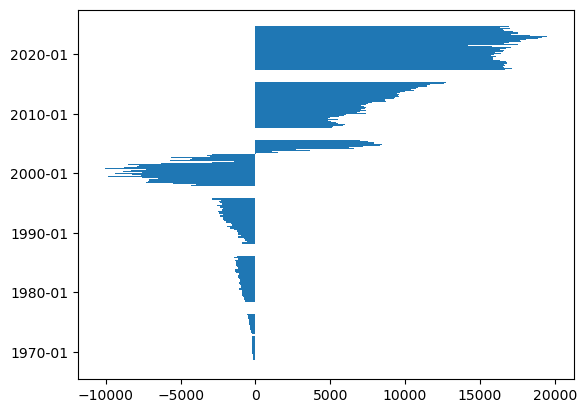

In [15]:
### Create plot
# Select values for x and y axes
myears = df_plot['myear'].values
vals = df_plot['pdev'].values

# Plot horizontal bars
fig, ax = plt.subplots()
ax.barh(myears, vals)
#ax.yaxis.set_major_locator(matplotlib.dates.YearLocator(10))

# Use only one label per decade
#ax.yaxis.set_minor_locator(matplotlib.dates.YearLocator())

ytickvals = [x for x in myears \
    if x[-3:] == '-01' and x[0:4] in [str(y) for y in range(1970, 2030, 10)]]
plt.yticks(ytickvals)



Looks like some reporting may have changed at the end of the 2000s. Let us next try a line plot including all countries and the UK average.

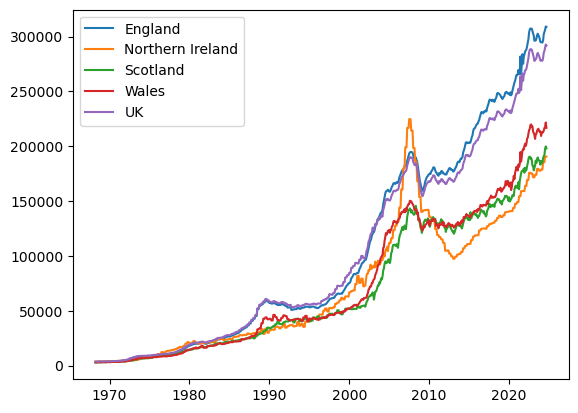

In [16]:
### Get values for countries and plot them over time
fig, ax = plt.subplots()
for ctry in df_ctry['RegionName'].unique():   
    vals = df_ctry.loc[(df_ctry['RegionName'] == ctry), 'AveragePrice'].values
    myears = df_ctry.loc[(df_ctry['RegionName'] == ctry), 'Date'].values
    ax.plot(myears, vals, label = ctry)
# Add UK    
vals = df_uk['AveragePrice'].values
myears = df_uk['Date'].values
ax.plot(myears, vals, label = 'UK')
# Use only one label per decade
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10, month=1, day=1))
### Add legend
plt.legend()
    

# 3. Correlation plots
Let us take a look at some cross-sectional correlations. We can begin by looking at the correlation between quantities (SalesVolume) and price (AveragePrice).

Text(0, 0.5, 'Sales')

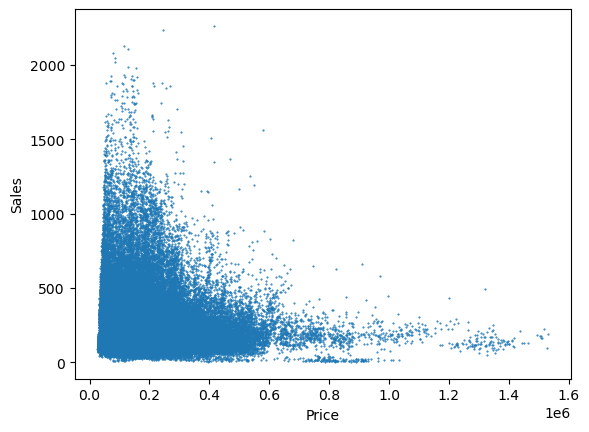

In [17]:
### Set country to look at
ctry = 'England'

### Take only country data
df_plot = df_lad[df_lad['CTRY23NM'] == ctry]

### Plot scatterplot of quantities and prices
plt.scatter(df_plot['AveragePrice'], df_plot['SalesVolume'], \
    marker = '.', s = 1)
plt.xlabel('Price')
plt.ylabel('Sales')


<Axes: xlabel='AveragePrice', ylabel='SalesVolume'>

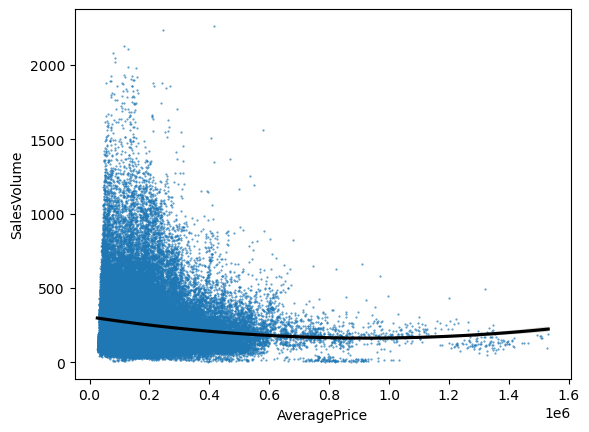

In [18]:
### Add a regression line using seaborn
sns.regplot(x='AveragePrice', y='SalesVolume', data = df_plot, \
    order = 2, \
    marker = '.', \
    scatter_kws = {'s':1}, \
    line_kws = {'color':'black'})

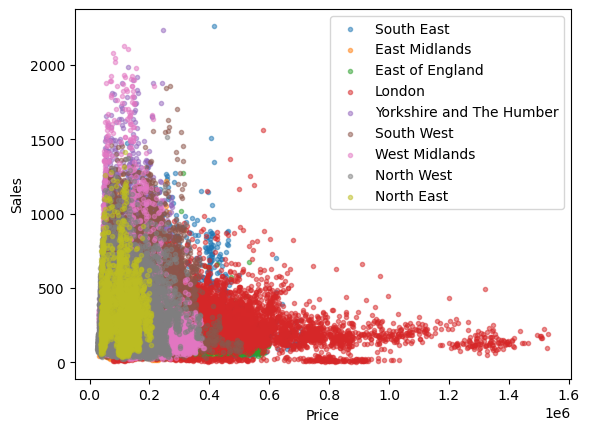

In [19]:
### Scatterplot with different colours for regions
fig, ax = plt.subplots()
for reg in df_plot['RGN23NM'].unique():
    df_reg = df_plot[df_plot['RGN23NM'] == reg]
    plt.scatter(df_reg['AveragePrice'], df_reg['SalesVolume'], \
        marker = '.', alpha = 0.5, label = reg)
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
    

# 4. Rankings
Next, show which regions had the highest total number of sales in the data.

In [20]:
### Aggregate regional data and sum number of sales
df_agg = df_rgn[['RegionName', 'SalesVolume']].groupby('RegionName').agg('sum') \
    .reset_index() \
    .sort_values('SalesVolume') # Sort by decreasing sales volume

<BarContainer object of 12 artists>

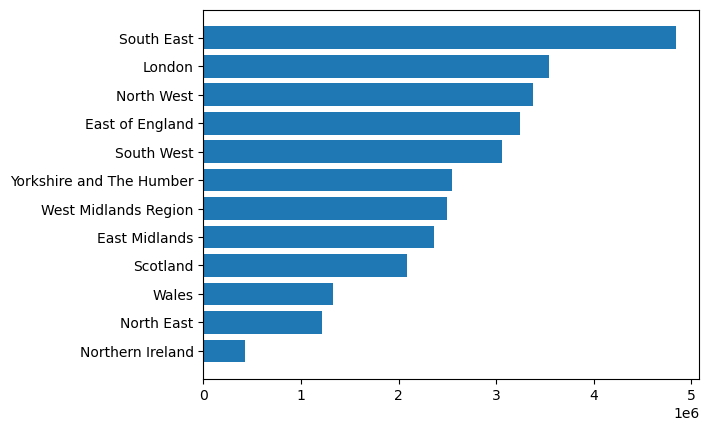

In [21]:
### Plot horizontal bar chart
plt.barh(df_agg['RegionName'], df_agg['SalesVolume'])

# 5. Distributions
Now, show the distribution of average house prices in a histogram.

(array([1.290e+03, 8.055e+03, 7.137e+03, 5.453e+03, 5.704e+03, 7.579e+03,
        9.097e+03, 9.629e+03, 8.570e+03, 7.782e+03, 7.283e+03, 6.668e+03,
        5.392e+03, 4.446e+03, 3.700e+03, 3.236e+03, 2.999e+03, 2.829e+03,
        2.247e+03, 1.717e+03, 1.650e+03, 1.313e+03, 9.900e+02, 9.320e+02,
        9.620e+02, 9.740e+02, 8.050e+02, 6.830e+02, 5.900e+02, 6.050e+02,
        4.320e+02, 4.240e+02, 3.710e+02, 3.080e+02, 2.250e+02, 1.580e+02,
        1.530e+02, 1.320e+02, 9.600e+01, 6.100e+01, 6.900e+01, 7.900e+01,
        5.900e+01, 4.100e+01, 3.500e+01, 4.100e+01, 4.100e+01, 5.300e+01,
        5.200e+01, 4.600e+01, 3.400e+01, 2.900e+01, 4.600e+01, 3.300e+01,
        3.000e+01, 3.500e+01, 2.300e+01, 1.500e+01, 1.400e+01, 1.400e+01,
        1.300e+01, 9.000e+00, 2.200e+01, 1.300e+01, 7.000e+00, 1.300e+01,
        1.100e+01, 1.000e+01, 1.000e+01, 1.100e+01, 2.000e+00, 1.000e+01,
        7.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 5.000e+00, 3.000e+00,
        5.000e+00, 1.000e+01, 2.000e+0

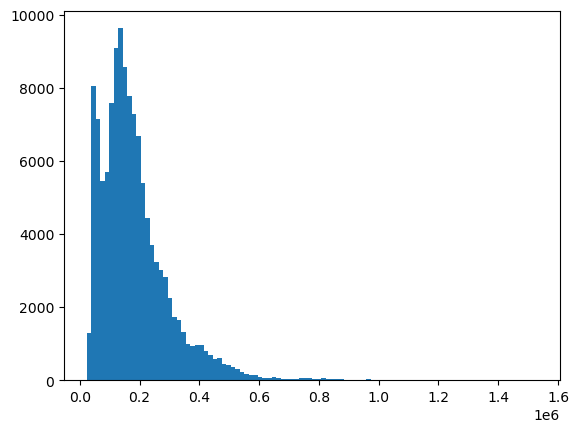

In [22]:
plt.hist(df_lad['AveragePrice'], bins = 100)

array([[<Axes: title={'center': 'England'}>,
        <Axes: title={'center': 'Northern Ireland'}>],
       [<Axes: title={'center': 'Scotland'}>,
        <Axes: title={'center': 'Wales'}>]], dtype=object)

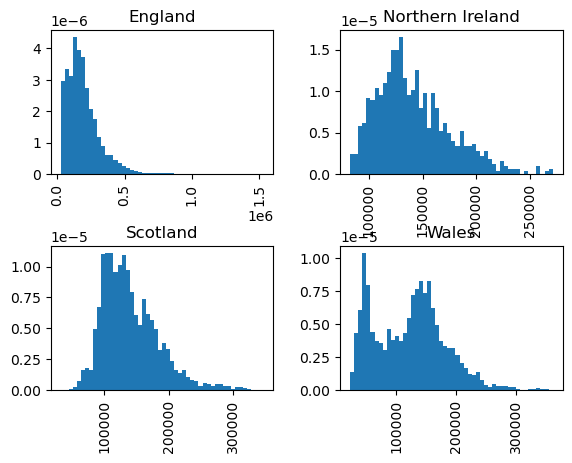

In [23]:
# Compare the distribution by country
df_lad.hist('AveragePrice', by = 'CTRY23NM', density = True, bins = 50)

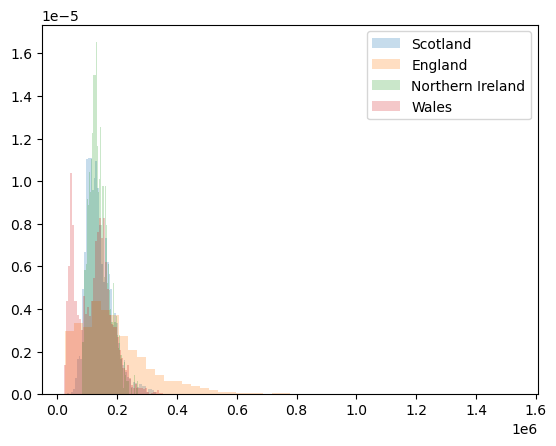

In [24]:
# Compare distribution by country in single plot
for ctry in df_lad['CTRY23NM'].unique():
    plt.hist(df_lad.loc[df_lad['CTRY23NM']==ctry, 'AveragePrice'], \
        alpha = 0.25, label = ctry, bins = 50, density = True)

# Add legend
plt.legend()

# 6. Shares
Show the share of sales from different countries over time from 2005 to most recent data.

([<matplotlib.axis.YTick at 0x15fbd2e70>,
 [Text(0, 2005, '2005'),
  Text(0, 2006, '2006'),
  Text(0, 2007, '2007'),
  Text(0, 2008, '2008'),
  Text(0, 2009, '2009'),
  Text(0, 2010, '2010'),
  Text(0, 2011, '2011'),
  Text(0, 2012, '2012'),
  Text(0, 2013, '2013'),
  Text(0, 2014, '2014'),
  Text(0, 2015, '2015'),
  Text(0, 2016, '2016'),
  Text(0, 2017, '2017'),
  Text(0, 2018, '2018'),
  Text(0, 2019, '2019'),
  Text(0, 2020, '2020'),
  Text(0, 2021, '2021'),
  Text(0, 2022, '2022'),
  Text(0, 2023, '2023'),
  Text(0, 2024, '2024')])

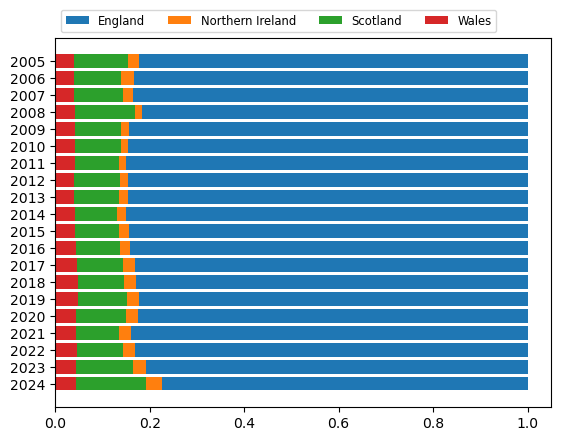

In [25]:
### Start figure
fig, ax = plt.subplots()

### Aggregate to countries and years
df_agg = df_ctry[df_ctry['year']>=2005] \
    .groupby(['RegionName', 'year']).agg({'SalesVolume': 'sum'}).reset_index()
### Aggregate by year
df_yrs = df_agg.groupby('year').agg({'SalesVolume': 'sum'}).reset_index()
df_agg = df_agg.merge(df_yrs, on = 'year', how = 'left', suffixes = ('', '_all'))
### Create relative sales
df_agg['salesshare'] = df_agg['SalesVolume']/df_agg['SalesVolume_all']

### Loop over countries
# Add values to shift bars to the left
barstarts = np.zeros(len(df_yrs))
for ctry in df_agg['RegionName'].unique():

    ### Data just for this country
    df_plot = df_agg[df_agg['RegionName'] == ctry]

    ### Get values for this country
    vals = df_plot['salesshare']

    ### Get starting point for bar chart
    # Update barstarts
    barstarts = barstarts + vals.values
    # Shift bars to the left
    starts = 1 - barstarts

    ### Draw rectangle
    rects = ax.barh(df_plot['year'], vals, left = starts, label = ctry)
# Add legend on top
ax.legend(ncols = 4, bbox_to_anchor=(0, 1), loc = 'lower left', fontsize = 'small')
# Sort years in ascending order
ax.invert_yaxis()
# Adjust year ticks
ytickvals = df_yrs['year'].values
plt.yticks(ytickvals)
    
    

    

# 7. Maps
Plot the average price by LAD in 2014 and compare to 2024.

In [31]:
### Load shapefile of LADs
# Use May 2023 to match lookup file above
# Available at https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2023-boundaries-uk-bgc

file_shp = 'lad_shp/LAD_MAY_2023_UK_BGC_V2.shp'

### Use Geopandas to open shapefile as GeoDataFrame
gdf_shp = gpd.read_file(file_shp)

In [143]:
### Take a look at shapefile
gdf_shp

,LAD24CD,LAD24NM,LAD24NMW,BNG_E,BNG_N,LONG,LAT,geometry
0,E06000001,Hartlepool,None,447161,531473,-1.270170,54.6761,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,Middlesbrough,None,451141,516887,-1.210990,54.5447,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,Redcar and Cleveland,None,464330,519596,-1.006560,54.5675,"POLYGON ((455553.038 528401.602, 455732.806 52..."
3,E06000004,Stockton-on-Tees,None,444940,518179,-1.306640,54.5569,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,Darlington,None,428029,515648,-1.568350,54.5353,"POLYGON ((423496.602 524724.299, 423497.204 52..."
5,E06000006,Halton,None,354246,382146,-2.688530,53.3342,"POLYGON ((351539.901 389475.203, 351630.102 38..."
6,E06000007,Warrington,None,362744,388457,-2.561670,53.3916,"POLYGON ((367308.201 398265.497, 367315.399 39..."
7,E06000008,Blackburn with Darwen,None,369489,422806,-2.463610,53.7008,"POLYGON ((369226.299 431801.198, 369234.000 43..."
8,E06000009,Blackpool,None,332817,436635,-3.022020,53.8216,"POLYGON ((331199.203 442677.804, 331370.197 44..."
9,E06000010,"Kingston upon Hull, City of",None,511892,431651,-0.303850,53.7692,"POLYGON ((510966.600 436533.003, 511217.497 43..."


<Axes: >

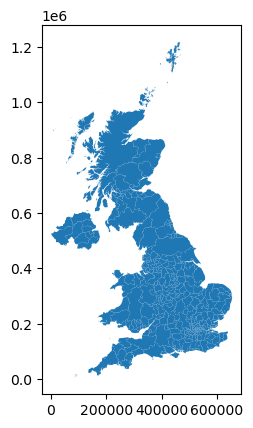

In [32]:
### Look at boundaries
gdf_shp.plot()

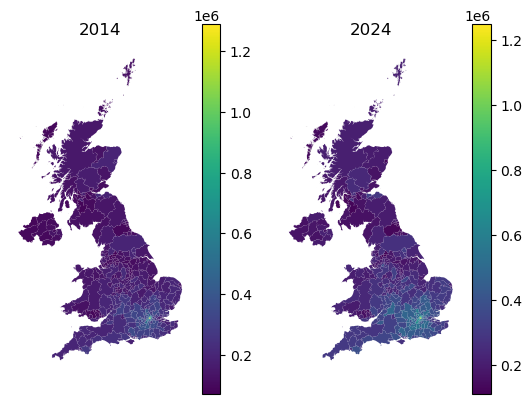

In [44]:
### Map for 2014 and 2024
fig, axes = plt.subplots(1,2)

for i, year in enumerate([2014, 2024]):

    ### Get data 
    df_yr = df_lad.loc[(df_lad['year'] == year), ['LAD23CD', 'AveragePrice']] \
        .groupby('LAD23CD').agg('mean').reset_index()
    
    ### Merge prices to shapefile
    gdf_plot = gdf_shp.merge(df_yr, \
        on = 'LAD23CD', how = 'left', validate = 'm:1') 
    
    gdf_plot.plot('AveragePrice', ax = axes[i], legend = True)
    # Set axes off
    axes[i].set_axis_off()
    # Add year as title
    axes[i].set_title(year)